In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100,100,4)
y = X + 10

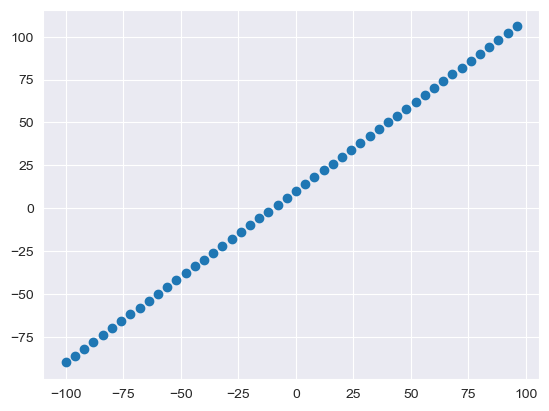

In [3]:
plt.scatter(X,y)

In [4]:
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [6]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]


In [10]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 995us/step - loss: 40.8315 - mae: 40.8315
Epoch 2/100
2/2 [==============================] - 0s 825us/step - loss: 37.6038 - mae: 37.6038
Epoch 3/100
2/2 [==============================] - 0s 835us/step - loss: 34.6149 - mae: 34.6149
Epoch 4/100
2/2 [==============================] - 0s 746us/step - loss: 31.5367 - mae: 31.5367
Epoch 5/100
2/2 [==============================] - 0s 781us/step - loss: 28.5986 - mae: 28.5986
Epoch 6/100
2/2 [==============================] - 0s 863us/step - loss: 26.0573 - mae: 26.0573
Epoch 7/100
2/2 [==============================] - 0s 956us/step - loss: 23.2349 - mae: 23.2349
Epoch 8/100
2/2 [==============================] - 0s 688us/step - loss: 20.9089 - mae: 20.9089
Epoch 9/100
2/2 [==============================] - 0s 815us/step - loss: 19.0798 - mae: 19.0798
Epoch 10/100
2/2 [==============================] - 0s 826us/step - loss: 17.3321 - mae: 17.3321
Epoch 11/100
2/2 [=====================

In [11]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 45.3400 - mae: 45.3400
Epoch 2/100
2/2 [==============================] - 0s 968us/step - loss: 40.0959 - mae: 40.0959
Epoch 3/100
2/2 [==============================] - 0s 960us/step - loss: 34.7106 - mae: 34.7106
Epoch 4/100
2/2 [==============================] - 0s 904us/step - loss: 29.3954 - mae: 29.3954
Epoch 5/100
2/2 [==============================] - 0s 871us/step - loss: 23.7659 - mae: 23.7659
Epoch 6/100
2/2 [==============================] - 0s 968us/step - loss: 18.6681 - mae: 18.6681
Epoch 7/100
2/2 [==============================] - 0s 999us/step - loss: 13.4684 - mae: 13.4684
Epoch 8/100
2/2 [==============================] - 0s 836us/step - loss: 9.0602 - mae: 9.0602
Epoch 9/100
2/2 [==============================] - 0s 887us/step - loss: 9.0128 - mae: 9.0128
Epoch 10/100
2/2 [==============================] - 0s 831us/step - loss: 10.4046 - mae: 10.4046
Epoch 11/100
2/2 [===========================

In [13]:
model_1.evaluate(tf.expand_dims(X_test, axis=1),y_test)

1/1 [==============================] - 0s 67ms/step - loss: 18.3834 - mae: 18.3834


[18.383403778076172, 18.383403778076172]

In [14]:
model_2.evaluate(tf.expand_dims(X_test, axis=1),y_test)

1/1 [==============================] - 0s 37ms/step - loss: 9.3135 - mae: 9.3135


[9.313505172729492, 9.313505172729492]

In [15]:
import pandas as pd


In [16]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [19]:
X=insurance_one_hot.drop('charges', axis=1)
y=insurance_one_hot['charges']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

model_3.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 435us/step - loss: 13335.0508 - mae: 13335.0508
Epoch 2/100
34/34 [==============================] - 0s 367us/step - loss: 13325.4688 - mae: 13325.4688
Epoch 3/100
34/34 [==============================] - 0s 337us/step - loss: 13313.1895 - mae: 13313.1895
Epoch 4/100
34/34 [==============================] - 0s 323us/step - loss: 13296.0498 - mae: 13296.0498
Epoch 5/100
34/34 [==============================] - 0s 398us/step - loss: 13271.1445 - mae: 13271.1445
Epoch 6/100
34/34 [==============================] - 0s 371us/step - loss: 13234.7021 - mae: 13234.7021
Epoch 7/100
34/34 [==============================] - 0s 370us/step - loss: 13182.8154 - mae: 13182.8154
Epoch 8/100
34/34 [==============================] - 0s 363us/step - loss: 13110.5117 - mae: 13110.5117
Epoch 9/100
34/34 [==============================] - 0s 335us/step - loss: 13011.1367 - mae: 13011.1367
Epoch 10/100
34/34 [==============================] - 0s 347us/s

In [22]:
model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 418us/step - loss: 6925.6221 - mae: 6925.6221


[6925.6220703125, 6925.6220703125]

In [23]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

model_4.fit(X_train,y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 485us/step - loss: 13309.6914 - mae: 13309.6914
Epoch 2/100
34/34 [==============================] - 0s 353us/step - loss: 13070.9863 - mae: 13070.9863
Epoch 3/100
34/34 [==============================] - 0s 370us/step - loss: 12221.1318 - mae: 12221.1318
Epoch 4/100
34/34 [==============================] - 0s 373us/step - loss: 10062.2764 - mae: 10062.2764
Epoch 5/100
34/34 [==============================] - 0s 379us/step - loss: 7729.5181 - mae: 7729.5181
Epoch 6/100
34/34 [==============================] - 0s 390us/step - loss: 7393.5381 - mae: 7393.5381
Epoch 7/100
34/34 [==============================] - 0s 358us/step - loss: 7352.4224 - mae: 7352.4224
Epoch 8/100
34/34 [==============================] - 0s 336us/step - loss: 7316.5488 - mae: 7316.5488
Epoch 9/100
34/34 [==============================] - 0s 402us/step - loss: 7280.3013 - mae: 7280.3013
Epoch 10/100
34/34 [==============================] - 0s 380us/step - loss

In [24]:
model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 549us/step - loss: 3506.9512 - mae: 3506.9512


[3506.951171875, 3506.951171875]

In [25]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)


57026/57026 [==============================] - 0s 1us/step


In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

model_5.fit(X_train,y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 544us/step - loss: 37.7315 - mae: 37.7315
Epoch 2/100
13/13 [==============================] - 0s 424us/step - loss: 14.7571 - mae: 14.7571
Epoch 3/100
13/13 [==============================] - 0s 394us/step - loss: 9.8026 - mae: 9.8026
Epoch 4/100
13/13 [==============================] - 0s 405us/step - loss: 7.5306 - mae: 7.5306
Epoch 5/100
13/13 [==============================] - 0s 364us/step - loss: 6.6121 - mae: 6.6121
Epoch 6/100
13/13 [==============================] - 0s 393us/step - loss: 6.3290 - mae: 6.3290
Epoch 7/100
13/13 [==============================] - 0s 380us/step - loss: 6.0683 - mae: 6.0683
Epoch 8/100
13/13 [==============================] - 0s 363us/step - loss: 6.8454 - mae: 6.8454
Epoch 9/100
13/13 [==============================] - 0s 357us/step - loss: 6.6170 - mae: 6.6170
Epoch 10/100
13/13 [==============================] - 0s 409us/step - loss: 6.0989 - mae: 6.0989
Epoch 11/100
13/13 [===============

In [27]:
model_5.evaluate(X_test,y_test)

4/4 [==============================] - 0s 635us/step - loss: 4.1521 - mae: 4.1521


[4.152142524719238, 4.152142524719238]

In [28]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1400      
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,531
Trainable params: 2,531
Non-trainable params: 0
_________________________________________________________________
